In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.dpi'] = 150

df = pd.read_csv("HousingData_train.csv")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [2]:
# Checking for null or nan values
df.isnull().sum()

CRIM       20
ZN         19
INDUS      19
CHAS       18
NOX         0
RM          0
AGE        19
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      18
MEDV        0
dtype: int64

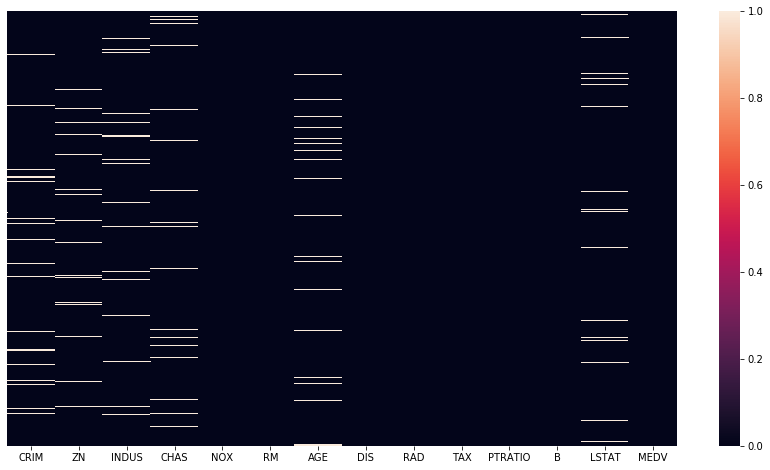

In [3]:
# Visualizing Missing or nan Values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), yticklabels=False)

In [4]:
# Impute CHAS categorical feature using median of the column
print(df["CHAS"].unique())
df["CHAS"].fillna((df['CHAS'].median()), inplace=True)
df["CHAS"] = df["CHAS"].apply(np.int64) 
df.head()

[ 0. nan  1.]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
# Get the dependent variable column
y = df["MEDV"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [6]:
# Get the independent variable column
X = df.drop(["MEDV"], axis=1).select_dtypes(exclude=['object'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


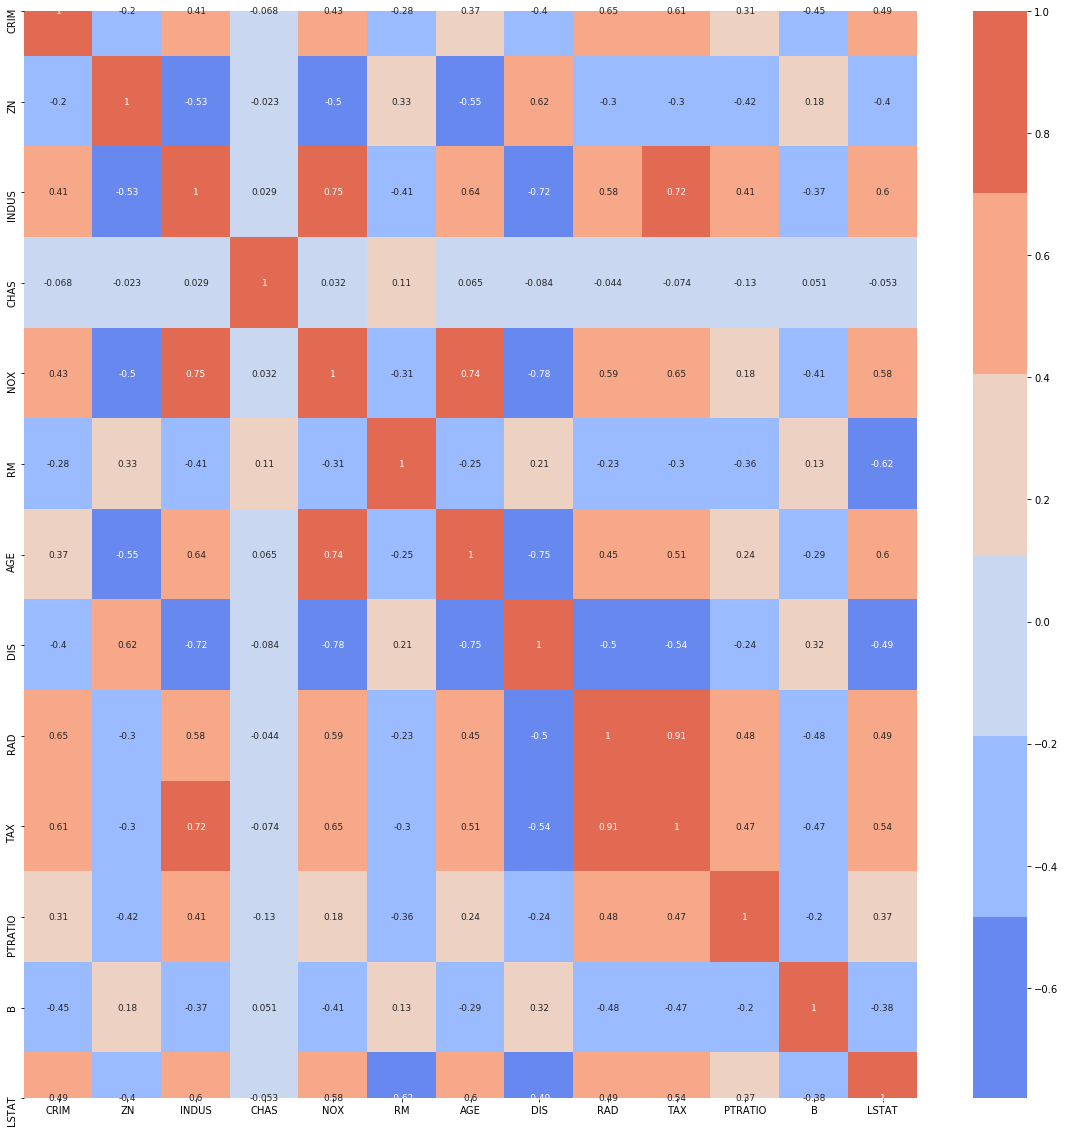

In [7]:
# Plotting correlation between features
plt.figure(figsize=(20,20))

corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, annot_kws={"size":9},
            cmap=sns.color_palette("coolwarm"))

In [8]:
# Using KNN Imputer to fill the rest of the missing values
from sklearn.impute import KNNImputer

og_X_column = list(X.columns.values)
impute_knn = KNNImputer(n_neighbors=2)
X = impute_knn.fit_transform(X)

X = pd.DataFrame(X,columns=og_X_column)
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
# Checking the dataframe after cleaning
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,3.462619,10.882762,11.203683,0.066381,0.553545,6.292741,68.404818,3.762997,9.468951,405.644540,18.341113,354.537687,12.488330
std,7.890686,22.620168,6.936512,0.249214,0.115172,0.714266,27.672740,2.002119,8.671929,169.161749,2.177228,94.204705,7.163561
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.160000,0.000000,0.449000,5.888500,45.750000,2.087550,4.000000,277.000000,16.900000,374.495000,6.910000
50%,0.253560,0.000000,9.900000,0.000000,0.532000,6.216000,76.500000,3.272100,5.000000,329.000000,18.700000,391.230000,10.695000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.630500,93.600000,5.164950,24.000000,666.000000,20.200000,396.220000,16.437500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000


In [10]:
# Grid Search Hyperparameter 
params = {
    "learning_rate"   : [ 0.05, 0.10, 0.15, 0.20, 0.25 ],
    "max_depth"       : [ 3 , 5, 8, 10, 15 ],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4],
    "alpha"           : [0, 2, 6 ,8 , 10],
    "colsample_bytree": [ 0.3, 0.5, 0.7],
    "min_child_weight" : [ 1, 3, 5, 7 ]
}

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()
# x_minmax = min_max_scaler.fit_transform(X)


xReg_model = xgb.XGBRegressor()

x_train , x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=True)



In [11]:
#random_search=RandomizedSearchCV(xReg_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

grid_xReg = GridSearchCV(estimator=xReg_model, param_grid = params, cv = 5, n_jobs=-1, verbose=10)
grid_xReg.fit(X, y)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [13]:
print("Best Estiamtor:\n",grid_xReg.best_estimator_)
print("Best Score:\n",grid_xReg.best_score_)
print("Parameter List:\n",grid_xReg.best_params_)

Best Estiamtor:
 XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best Score:
 0.6871991873287506
Parameter List:
 {'alpha': 0, 'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}


# Run Linear Regression as baseline

In [12]:
from sklearn.linear_model import LinearRegression 

l_regr = LinearRegression()
l_regr.fit(x_train, y_train)
cv_score_lr = cross_val_score(xReg_model, x_train, y_train, cv=10)
print("Cross Validation Scores: ", cv_score_lr)


# Predict the model 
pred = l_regr.predict(x_test) 
  

# RMSE Computation 
print("\nMSE is: {:.4f}".format(MSE(y_test, pred))) 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE is: {:.4f}".format(rmse)) 
r2 = r2_score(y_test, pred)
print('R^2 score is {:.4f}'.format(r2))




Cross Validation Scores:  [0.87054785 0.88530417 0.90148631 0.83499592 0.83106333 0.80776188
 0.84598269 0.83315565 0.71226756 0.92281554]

MSE is: 29.2751
RMSE is: 5.4106
R^2 score is 0.7139


# Run XGBoost Regression with optimized hyperparameters

In [13]:
xReg_model = xgb.XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
                             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
                             importance_type='gain', interaction_constraints='',
                             learning_rate=0.1, max_delta_step=0, max_depth=3,
                             min_child_weight=3, monotone_constraints='()',
                             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
                             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                             tree_method='exact', validate_parameters=1, verbosity=None) 


# Fitting the model 
xReg_model.fit(x_train, y_train) 

score = xReg_model.score(x_train, y_train)

cv_score = cross_val_score(xReg_model, x_train, y_train, cv=10)
print("Cross Validation Scores: ", cv_score)

  
# Predict the model 
pred = xReg_model.predict(x_test) 
  
# RMSE Computation 
print("\nMSE is: {}".format(MSE(y_test, pred))) 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE is: {}".format(rmse)) 
r2 = r2_score(y_test, pred)
print('R^2 score is {}'.format(r2))




Cross Validation Scores:  [0.90645501 0.9055659  0.93251901 0.82030366 0.85895392 0.7974885
 0.8325901  0.85873396 0.82781702 0.88085664]

MSE is: 12.007170303981974
RMSE is: 3.465136404816118
R^2 score is 0.8826423610395047


# Run prediction on Test Set 

In [14]:
# Read Test Data
df_test = pd.read_csv("HousingData_test.csv")
df_test.head()
df_test.isnull().sum()

CRIM       0
ZN         1
INDUS      1
CHAS       2
NOX        0
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      2
dtype: int64

In [15]:
# Impute CHAS categorical feature using median of the column for test data
print(df_test["CHAS"].unique())
df_test["CHAS"].fillna((df_test['CHAS'].median()), inplace=True)
df_test["CHAS"] = df_test["CHAS"].apply(np.int64) 
df_test.isnull().sum()

[ 0. nan  1.]


CRIM       0
ZN         1
INDUS      1
CHAS       0
NOX        0
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      2
dtype: int64

In [16]:
# Check test dataframe
df_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.39063,0.0,18.1,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
1,22.05110,0.0,18.1,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,NaN
2,9.72418,0.0,18.1,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,NaN
3,5.66637,0.0,18.1,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59
4,23.64820,0.0,18.1,0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69


In [17]:
# Impute missing values

X_Test_Df = impute_knn.fit_transform(df_test)
X_Test_Df = pd.DataFrame(X_Test_Df,columns=og_X_column)
X_Test_Df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.39063,0.0,18.1,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.880
1,22.05110,0.0,18.1,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.735
2,9.72418,0.0,18.1,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,15.435
3,5.66637,0.0,18.1,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.590
4,23.64820,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.690


In [18]:
# Predict using the XGBoost Model and append it to the test dataframe
# Predicted value is saved under new column name Predicted_MEDV
predict_test = xReg_model.predict(X_Test_Df)
X_Test_Df["Predicted_MEDV"] = predict_test
X_Test_Df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted_MEDV
0,9.39063,0.0,18.1,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.880,10.405820
1,22.05110,0.0,18.1,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.735,9.900317
2,9.72418,0.0,18.1,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,15.435,14.565972
3,5.66637,0.0,18.1,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.590,15.323722
4,23.64820,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.690,10.073396


# Export Saved pipeline files 

In [74]:
# Pickle pipeline file and dump
from joblib import dump, load
dump(impute_knn, 'knn_imputer.joblib')
dump(xReg_model, 'xg_regressor.joblib')

['xg_regressor.joblib']

In [24]:
# Load Model saved
impute_knn_loaded = load('knn_imputer.joblib') 
xReg_model_loaded = load('xg_regressor.joblib') 

In [25]:
# Run example prediction
x_tester = [9.39063, 0.0, 18.1, 0 , 0.740, 5.627, 93.9, 1.8172, 24.0, 666.0, 20.2, 396.90, 22.880]
x_tester_np = np.asarray(x_tester)
x_tester_np

# .reshape(-1, 1)

array([  9.39063,   0.     ,  18.1    ,   0.     ,   0.74   ,   5.627  ,
        93.9    ,   1.8172 ,  24.     , 666.     ,  20.2    , 396.9    ,
        22.88   ])

In [26]:
x_tester_np.reshape(1, -1)

array([[  9.39063,   0.     ,  18.1    ,   0.     ,   0.74   ,   5.627  ,
         93.9    ,   1.8172 ,  24.     , 666.     ,  20.2    , 396.9    ,
         22.88   ]])

In [27]:
x_tester_df = impute_knn_loaded.fit_transform([x_tester_np])
x_tester_df = pd.DataFrame(x_tester_df,columns=og_X_column)
x_tester_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.39063,0.0,18.1,0.0,0.74,5.627,93.9,1.8172,24.0,666.0,20.2,396.9,22.88


In [28]:
xReg_model_loaded.predict(x_tester_df)

array([11.322878], dtype=float32)